In [2]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
sns.set()
sns.set(rc={"figure.figsize": (10, 8)})

In [4]:
PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())

In [5]:
RANDOM_STATE = 42

In [6]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

In [7]:
iris = pd.DataFrame(
    dataset.data,
    columns=features)

In [8]:
iris[target] = dataset.target

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
def plot_iris_3d(x, y, z, title):
    sns.set_style('whitegrid')
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=iris['species'],
               cmap='autumn',
               s=40,
               edgecolors='black')
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

In [15]:
pca = PCA(n_components=3)
points_pca = pca.fit_transform(iris[features])

tsne = TSNE(n_components=3, n_iter=5000, random_state=RANDOM_STATE)
points_tsn3 = tsne.fit_transform(iris[features])

d:\Trung\Python\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Trung\Python\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\admin\AppData\Local\Temp\ipykernel_6036\4017267997.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


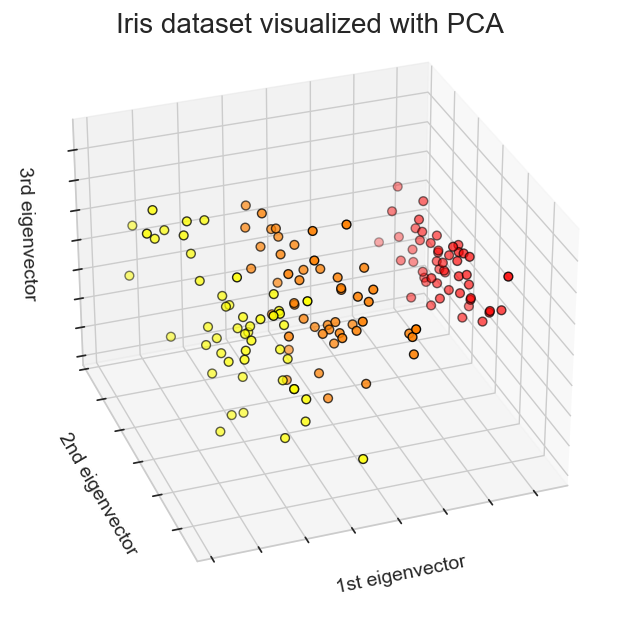

In [40]:
plot_iris_3d(
    x = points_pca[:,0],
    y = points_pca[:,1],
    z = points_pca[:,2],
    title = "Iris dataset visualized with PCA")

C:\Users\admin\AppData\Local\Temp\ipykernel_6036\4017267997.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


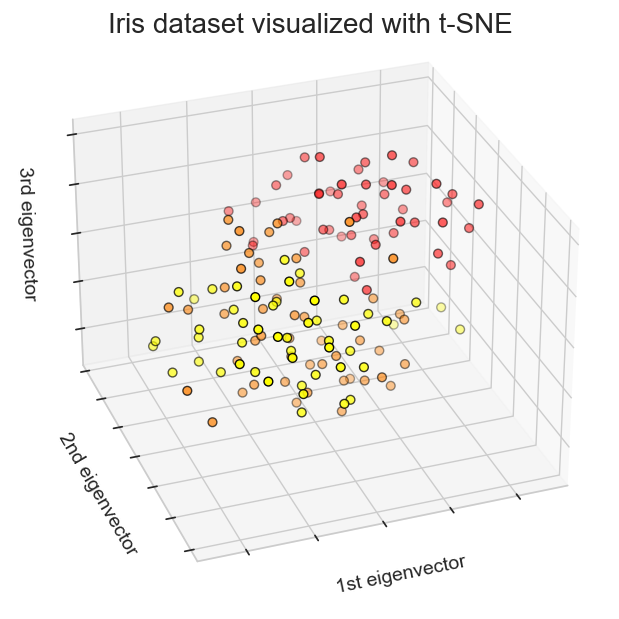

In [41]:
plot_iris_3d(
    x = points_tsn3[:,0],
    y = points_tsn3[:,1],
    z = points_tsn3[:,2],
    title = "Iris dataset visualized with t-SNE")